In [2]:
import pandas as pd
from __init__ import *


file_name = 'XY_aug_feat.csv'
file_path = f'data/{file_name}'
df = pd.read_csv(file_path, index_col=0, encoding='utf-8')
df = df.loc[:, ~df.columns.str.startswith('y_')]
df.index = pd.to_datetime(df.index)
y = '中国:贷款市场报价利率(LPR):1年'

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Automatically adjust width

# Assuming 'df' is already loaded and has the columns you want to analyze
x_list = df.columns

# Ensure the index is in datetime format (if it's not already)
df.index = pd.to_datetime(df.index)

# Create a DataFrame to store results
changes_per_year_all = pd.DataFrame()

# Loop through each column and calculate the number of changes per year
for x in x_list:
    df_change = df.copy()
    df_change[f'{x}_change'] = df_change[x].ne(df_change[x].shift())
    changes_per_year = df_change[df_change[f'{x}_change']].resample('YE').size()

    # Add the result to the results DataFrame
    changes_per_year_all[x] = changes_per_year

# Display the results in a clear way
print("Number of changes per year for each column:")
changes_per_year_all

Number of changes per year for each column:


,China_GDP,China_Inflation,China_Public_Debt,China_Gov_Lending,US_Interest_Rates,US_Composite_Leading_Indicator,China_Composite_Leading_Indicator,China_Business_Confidence,Shanghai_Composite,CNYUSD,CNYEUR,中国:贷款市场报价利率(LPR):1年,中期借贷便利(MLF):操作利率:1年,GDP:不变价:当季同比,消费者指数:信心指数,国债到期收益率:6月,国债到期收益率:1年,国债到期收益率:2年,国债到期收益率:3年,国债到期收益率:4年,国债到期收益率:5年,国债到期收益率:6年,国债到期收益率:7年,国债到期收益率:8年,国债到期收益率:9年,国债到期收益率:10年,国债到期收益率:15年,国债到期收益率:20年,国债到期收益率:30年,中国银行:净息差,国民总储蓄率,"未来3个月准备增加""购房""支出的比例",居民人均可支配收入,中债中国绿色债券指数(总值)净价指数,制造业PMI,出口总值(人民币计价):当月值,CPI:当月值,房地产开发投资:当月值,规模以上工业增加值:定基指数,全国城镇调查失业率,M2_MOM,M1_MOM,ppi,TR_Interest_Rate,Bond_Spread
2016-12-31,1,1,1,1,8.0,12,12,12,12,12,12,1,2,3,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,4,1,4,1,12,10,12,10,10,12,1,1,1,1,12,12
2017-12-31,1,1,1,1,9.0,12,12,12,12,12,12,0,3,3,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,4,1,4,1,12,11,12,11,10,12,0,0,0,0,12,12
2018-12-31,1,1,1,1,9.0,12,12,12,12,12,12,0,1,3,11,12,12,12,12,12,12,12,11,12,12,12,12,12,12,4,1,4,1,12,12,12,10,10,12,8,0,0,0,12,12
2019-12-31,1,1,1,1,8.0,12,12,12,12,12,12,2,1,4,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,3,1,4,1,12,10,12,9,10,12,9,0,0,0,12,12
2020-12-31,1,1,1,1,7.0,12,12,12,12,12,12,2,2,4,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,4,1,4,1,12,12,12,12,10,12,10,0,0,0,12,12
2021-12-31,1,1,1,1,7.0,12,12,12,12,12,12,1,0,4,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,3,1,4,1,12,12,12,12,10,12,9,0,0,0,12,12
2022-12-31,1,1,1,1,9.0,12,12,12,12,12,12,2,2,4,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,4,1,3,1,12,12,12,10,10,11,11,0,0,0,12,12
2023-12-31,1,1,1,1,NaN,1,1,1,12,12,12,2,2,4,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,4,1,4,1,12,12,12,12,10,12,7,6,6,6,12,12


In [5]:
# Initialize an empty dictionary to store the results
average_months_between_changes = {}

df_monthly = df

# Loop over each column to calculate the average months between changes
for y_ in df_monthly.columns:
    # Identify where the value changes compared to the previous month
    changes = df_monthly[y_].ne(df_monthly[y_].shift())
    
    # Get the indices where changes occur
    change_dates = df_monthly[changes].index
    
    # Calculate the difference between consecutive change dates in months
    if len(change_dates) > 1:  # Only proceed if there are at least two changes
        # Calculate the difference between consecutive change dates
        timedelta_diff = change_dates[1:] - change_dates[:-1]
        
        # Convert the Timedelta to months using the average number of days per month (30.44 days)
        months_diff = timedelta_diff.days / 30.44
        
        # Compute the average number of months between changes
        average_months_between_changes[y_] = months_diff.values.mean()
    else:
        average_months_between_changes[y_] = None  # No changes, so we return None

avg_months_df = pd.DataFrame(list(average_months_between_changes.items()), columns=['Variable', 'Average Months Between Changes'])
avg_months_df

,Variable,Average Months Between Changes
0,China_GDP,12.000188
1,China_Inflation,12.000188
2,China_Public_Debt,12.000188
3,China_Gov_Lending,12.000188
4,US_Interest_Rates,1.481838
5,US_Composite_Leading_Indicator,1.000016
6,China_Composite_Leading_Indicator,1.000016
7,China_Business_Confidence,1.000016
8,Shanghai_Composite,0.999409
9,CNYUSD,0.999409


In [6]:
summary_stats = df.describe()
print('Summary statistics:')
print(summary_stats)

Summary statistics:
        China_GDP  China_Inflation  China_Public_Debt  China_Gov_Lending  \
count  110.000000       110.000000         110.000000         110.000000   
mean    15.345167         1.576362          68.175327          -6.054273   
std      2.468507         0.896505          12.167071           1.949144   
min     11.233314         0.234837          50.701000          -9.718000   
25%     13.894908         0.981015          56.659000          -6.945000   
50%     14.687744         1.973576          70.155000          -6.102000   
75%     17.794783         2.074790          77.393000          -4.283000   
max     17.881783         2.899234          84.381000          -3.392000   

       US_Interest_Rates  US_Composite_Leading_Indicator  \
count         110.000000                      110.000000   
mean            1.842909                       99.502400   
std             1.652503                        1.106994   
min             0.050000                       93.48370

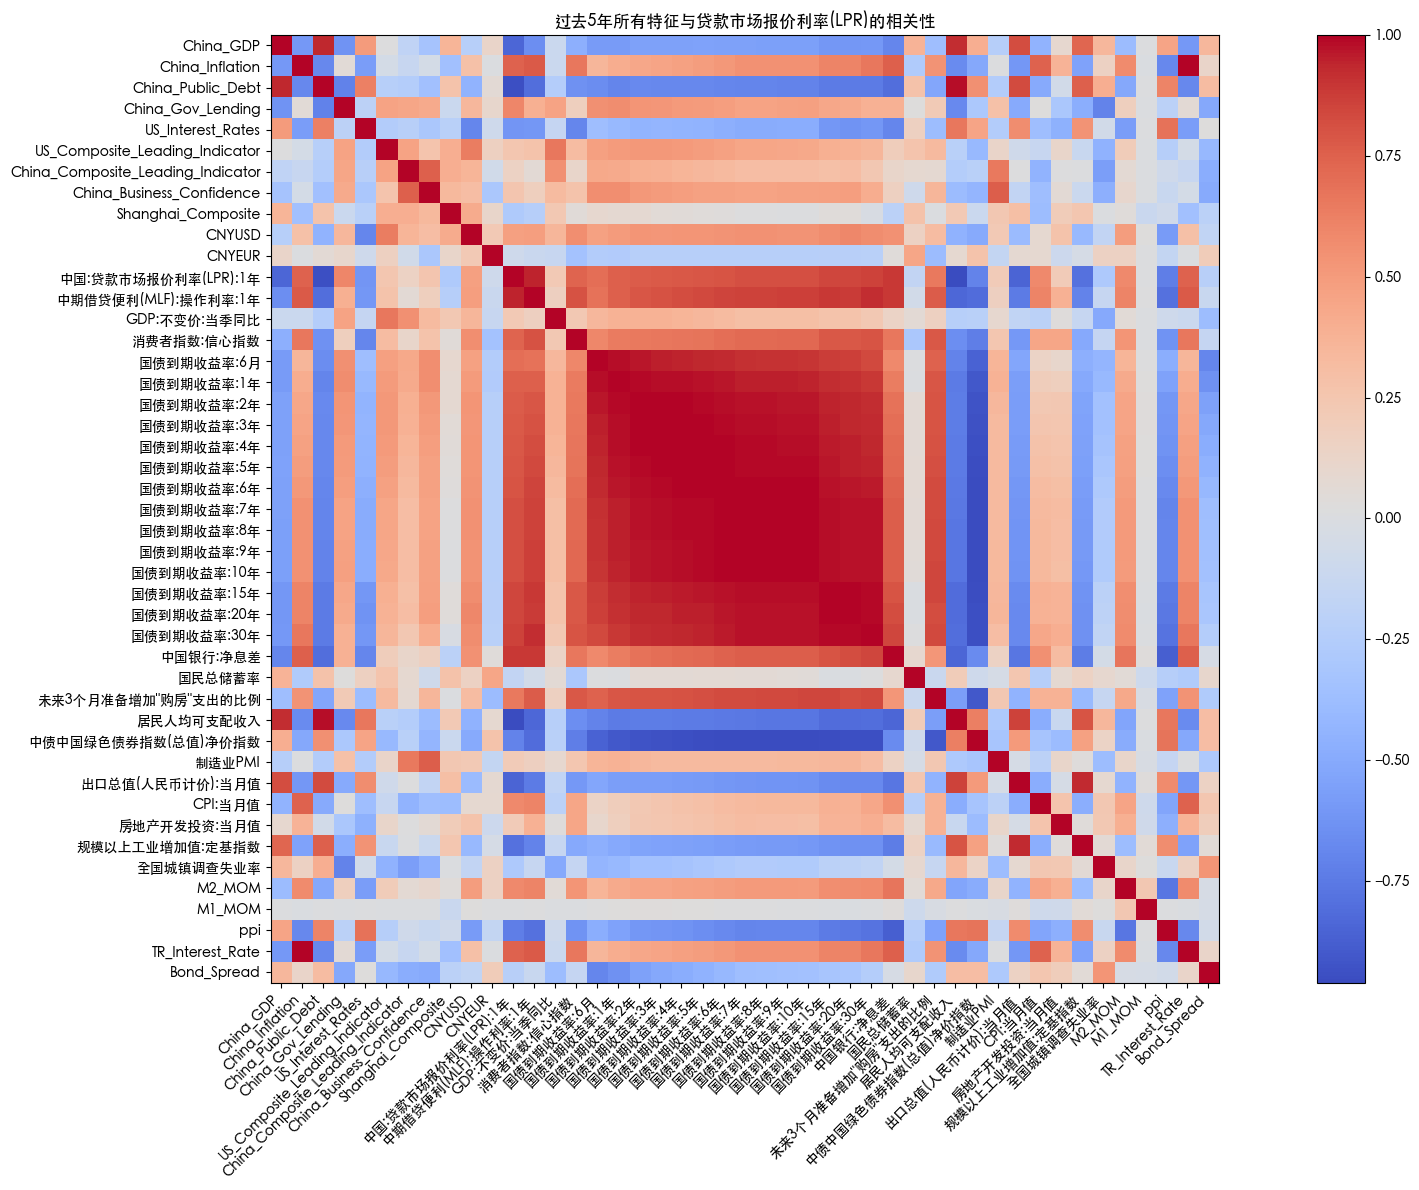

In [7]:
import matplotlib.pyplot as plt
import numpy as np


correlation_matrix = df.corr()
plt.figure(figsize=(20, 12))
plt.title('过去5年所有特征与贷款市场报价利率(LPR)的相关性')
cax = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(cax)
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.rcParams['font.sans-serif'] = ['Heiti TC'] # Or ['SimHei']
plt.tight_layout()
plt.show()

In [8]:
correlation_y = df.corr()[[y]].sort_values(by=y, ascending=False)
correlation_y

,中国:贷款市场报价利率(LPR):1年
中国:贷款市场报价利率(LPR):1年,1.000000
中期借贷便利(MLF):操作利率:1年,0.941563
中国银行:净息差,0.885213
国债到期收益率:30年,0.858430
国债到期收益率:15年,0.844512
国债到期收益率:20年,0.839734
国债到期收益率:10年,0.815423
国债到期收益率:9年,0.814036
国债到期收益率:8年,0.811956
国债到期收益率:7年,0.809244


In [9]:
# Shift 'y' column by +1 step into the future
df[y+'_1'] = df[y].shift(-1)
correlation_y1 = df.corr()[[y+'_1']].sort_values(by=y+'_1', ascending=False)
df = df.drop(columns=[y+'_1'])
correlation_y1

,中国:贷款市场报价利率(LPR):1年_1
中国:贷款市场报价利率(LPR):1年_1,1.000000
中国:贷款市场报价利率(LPR):1年,0.994411
中期借贷便利(MLF):操作利率:1年,0.936457
中国银行:净息差,0.884059
国债到期收益率:30年,0.855894
国债到期收益率:15年,0.842894
国债到期收益率:20年,0.839137
国债到期收益率:10年,0.812658
国债到期收益率:9年,0.811267
国债到期收益率:8年,0.809153


In [8]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd

def plot_and_save_to_pdf(
        df, 
        y, 
        pdf_filename="charts.pdf", 
        granularity="monthly", 
        subtract_rolling_avg=False,
        use_scaler=True
    ):
    scaler = MinMaxScaler()

    # Ensure correct granularity
    if granularity == "yearly":
        #for column in df.columns:
        #    if column != y:
        #        df[column] = df[column].resample('Y').last().bfill()
        df = df.resample('Y').last()
    elif granularity == "monthly":
        #df = df.resample('M').last()
        pass
    else:
        pass  # Keep original granularity

    # Compute rolling average if needed (exclude `y`)
    if subtract_rolling_avg:
        for column in df.columns:
            if column != y:
                df[column] = df[column] - df[column].rolling(window=6, min_periods=1).mean()

    df_plot = df[df.index.year >= 2014].copy()
    num_columns = df_plot.shape[1]
    n_plots_per_row = 2
    num_rows = int(np.ceil(num_columns / n_plots_per_row))

    # Scale the data
    if use_scaler:
        df_plot[y] = scaler.fit_transform(df_plot[[y]])
        for column in df_plot.columns:
            df_plot[column] = scaler.fit_transform(df_plot[[column]])

    # Initialize a PDF to save all plots
    with PdfPages(pdf_filename) as pdf:
        # Create subplots
        fig, axes = plt.subplots(
            nrows=num_rows, 
            ncols=n_plots_per_row, 
            figsize=(10 * n_plots_per_row, 5 * num_rows), 
            sharex=False
        )
        axes = axes.flatten()

        # Plot each column and df[y]
        for i, column in enumerate(df_plot.columns):
            if column == y:
                continue
            
            # Compute correlation
            correlation = df_plot[column].corr(df_plot[y])

            # Plot data
            axes[i].plot(df_plot.index, df_plot[column], label=column)
            axes[i].plot(df_plot.index, df_plot[y], label=f'{y}', linestyle='--', color='green')
            axes[i].set_title(f"{column} (Corr: {correlation:.2f})")
            axes[i].set_ylabel('Values')
            axes[i].legend()
            axes[i].grid()
            # Set the date format for the x-axis
            axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
            axes[i].tick_params(axis='x', rotation=45)

        # Hide unused subplots (if any)
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        # Save the current figure to PDF
        pdf.savefig(fig)
        plt.close(fig)  # Close the figure to free memory

    print(f"All charts have been saved to '{pdf_filename}'")

plot_and_save_to_pdf(df.copy(), y=y, granularity='monthly', subtract_rolling_avg=False, pdf_filename="monthly_charts.pdf")
plot_and_save_to_pdf(df.copy(), y=y, granularity='yearly', subtract_rolling_avg=False, pdf_filename="yearly_charts.pdf")
plot_and_save_to_pdf(df.copy(), y=y, granularity='monthly', subtract_rolling_avg=False, pdf_filename="monthly_charts_original.pdf", use_scaler=False)
plot_and_save_to_pdf(df.copy(), y=y, granularity='monthly', subtract_rolling_avg=True, pdf_filename="diff_mavg_charts.pdf")

All charts have been saved to 'monthly_charts.pdf'
All charts have been saved to 'yearly_charts.pdf'
All charts have been saved to 'monthly_charts_original.pdf'
All charts have been saved to 'diff_mavg_charts.pdf'


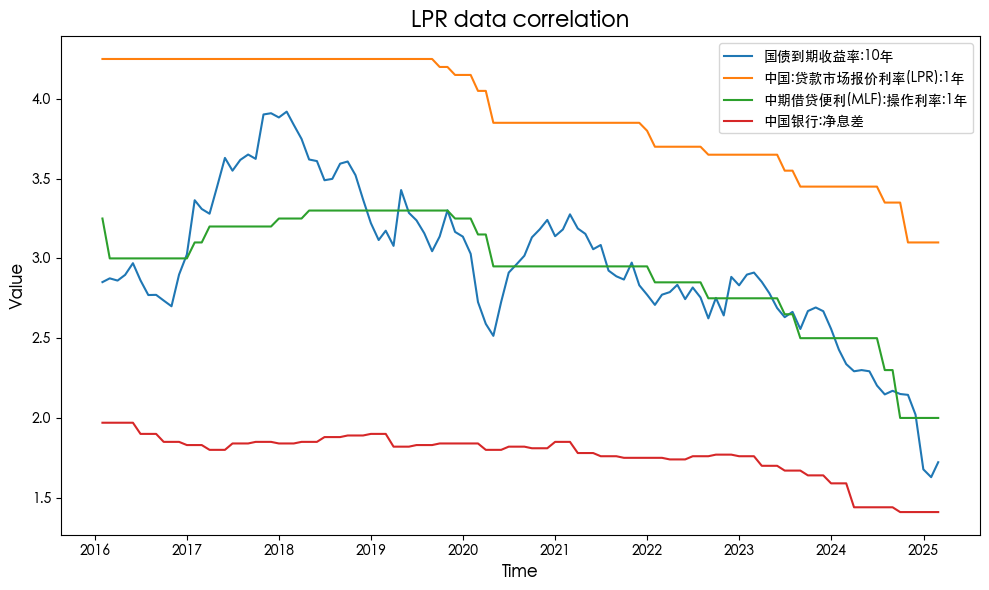

In [13]:
cols_to_plot = ['国债到期收益率:10年', '中国:贷款市场报价利率(LPR):1年', '中期借贷便利(MLF):操作利率:1年', '中国银行:净息差']
plt.figure(figsize=(10, 6))
df_plot = df[df.index.year >= 2014]
for col in cols_to_plot:
    plt.plot(df_plot.index, df_plot[col], label=col)

plt.title('LPR data correlation', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

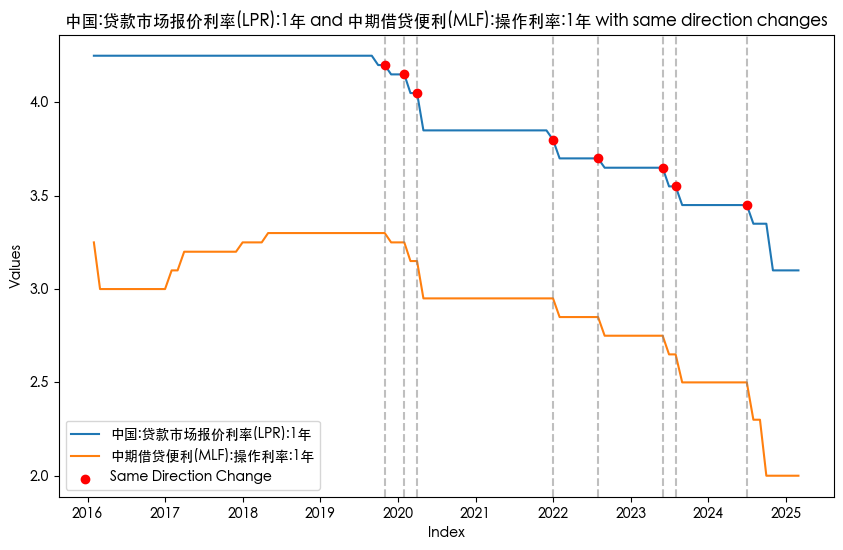

In [15]:
def plot_same_direction_changes(df, col1, col2):
    # Compute the direction of change (1 for increase, -1 for decrease, 0 for no change)
    df[f'{col1}_change'] = np.sign(df[col1].diff()).shift(-1)
    df[f'{col2}_change'] = np.sign(df[col2].diff()).shift(-1)
    same_direction = (df[f'{col1}_change'] == df[f'{col2}_change']) & (df[f'{col1}_change'] != 0)
    
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[col1], label=col1, marker='')
    plt.plot(df.index, df[col2], label=col2, marker='')

    # Mark the points where the values change in the same direction
    plt.scatter(df.index[same_direction], df[col1][same_direction], color='red', label='Same Direction Change', zorder=5)
    for idx in df.index[same_direction]:
        plt.axvline(x=idx, color='gray', linestyle='--', alpha=0.5)

    # Customize the plot
    plt.title(f'{col1} and {col2} with same direction changes')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()

    plt.show()

plot_same_direction_changes(df_plot, '中国:贷款市场报价利率(LPR):1年', '中期借贷便利(MLF):操作利率:1年')

In [16]:
def count_common_changes(df, col1, col2):
    # Compute the direction of change for both columns (1 for increase, -1 for decrease, 0 for no change)
    df[f'{col1}_change'] = np.sign(df[col1].diff()).shift(-1)
    df[f'{col2}_change'] = np.sign(df[col2].diff()).shift(-1)

    # Count how many changes in col2 correspond to a change in col1
    count_changes_in_col2_with_col1 = np.sum((df[f'{col1}_change'] != 0) & (df[f'{col2}_change'] != 0))

    # Count total changes in col2
    total_changes_in_col2 = np.sum(df[f'{col2}_change'] != 0)

    # Print the results
    print(f"Total changes in {col2}: {total_changes_in_col2}")
    print(f"Changes in {col2} that correspond to a change in {col1}: {count_changes_in_col2_with_col1}")


count_common_changes(df_plot, '中国:贷款市场报价利率(LPR):1年', '中期借贷便利(MLF):操作利率:1年')

Total changes in 中期借贷便利(MLF):操作利率:1年: 15
Changes in 中期借贷便利(MLF):操作利率:1年 that correspond to a change in 中国:贷款市场报价利率(LPR):1年: 9


Regression Metrics:
Train MSE: 0.0002
Train MAE: 0.0050
Train R^2: 0.8163
Test MSE: 0.0059
Test MAE: 0.0689
Test R^2: -1.3125


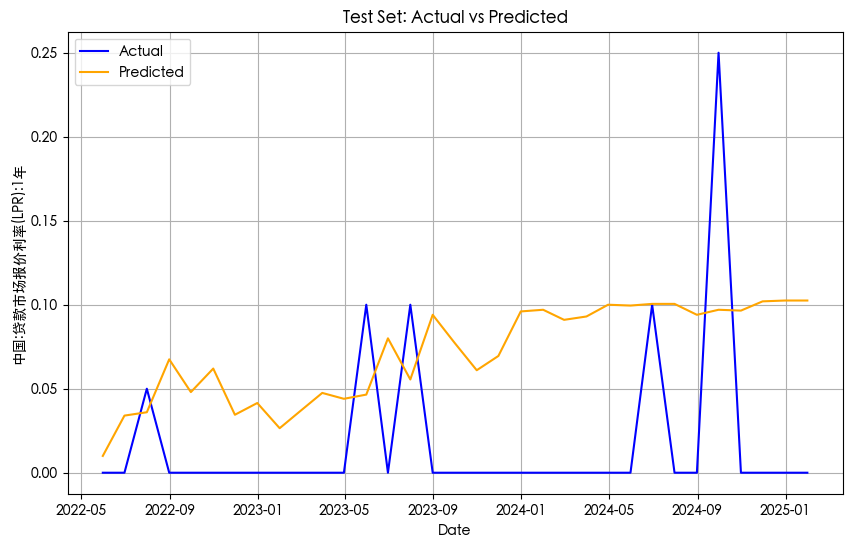

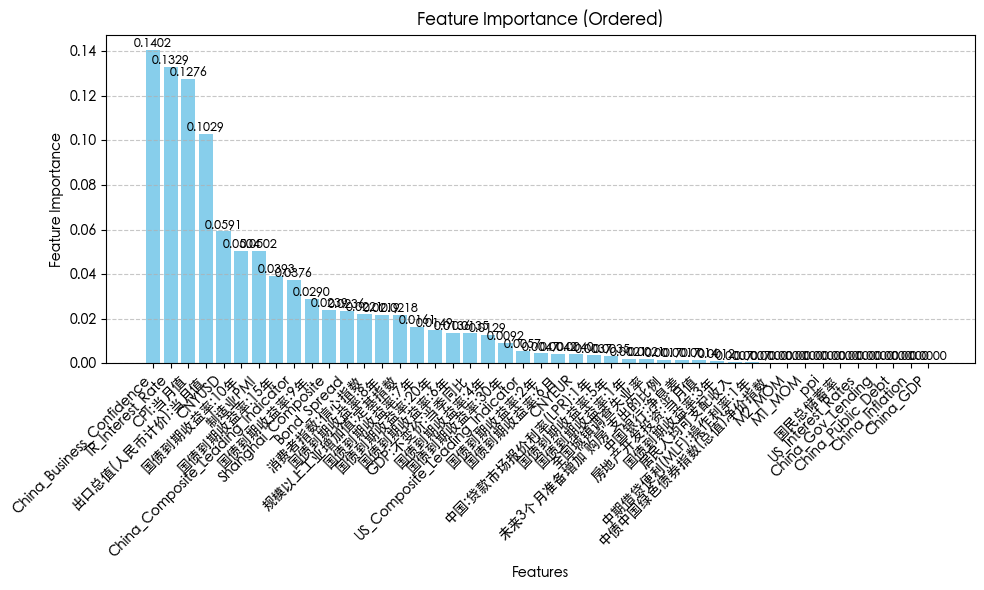

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def evaluate_random_forest(df, feature_columns, target_column, lag=1):
    # Create target
    #df[f'{target_column}_lagged'] = df[target_column].shift(-lag)
    df[f'{target_column}_diff'] = df[target_column].diff(-lag)
    df = df.dropna()

    # Define features (X) and target (y)
    X = df[feature_columns]
    y = df[f'{target_column}_diff']

    # Split data into train (70%) and test (30%)
    split_idx = int(len(df) * 0.7)
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

    # Fit Random Forest Regressor
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Predict on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute metrics
    metrics = {
        'Train MSE': mean_squared_error(y_train, y_train_pred),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Train R^2': r2_score(y_train, y_train_pred),
        'Test MSE': mean_squared_error(y_test, y_test_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Test R^2': r2_score(y_test, y_test_pred),
    }

    # Print metrics
    print("Regression Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    # Plot test set predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.plot(df.index[split_idx:], y_test, label="Actual", color="blue")
    plt.plot(df.index[split_idx:], y_test_pred, label="Predicted", color="orange")
    plt.xlabel("Date")
    plt.ylabel(target_column)
    plt.title("Test Set: Actual vs Predicted")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot feature importance as a bar chart
    feature_importances = model.feature_importances_
    sorted_indices = np.argsort(feature_importances)[::-1]
    sorted_features = [feature_columns[i] for i in sorted_indices]
    sorted_importances = feature_importances[sorted_indices]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(sorted_features, sorted_importances, color="skyblue")
    plt.xlabel("Features")
    plt.ylabel("Feature Importance")
    plt.title("Feature Importance (Ordered)")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Add values on top of bars
    for bar, importance in zip(bars, sorted_importances):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{importance:.4f}", 
                 ha="center", va="bottom", fontsize=9)

    plt.tight_layout()
    plt.show()


df_plot = df[df.index.year >= 2014]
cols = ['China_Unemployment_Rate',
       'China_Consumer_Confidence',
       'China_Public_Debt', 'China_Gov_Lending',
       'CNYUSD',
       '国债到期收益率:10年', #'中国银行:净息差', '国民总储蓄率',
       '房地产开发投资:当月同比',
       '中国:贷款市场报价利率(LPR):1年',
       '中期借贷便利(MLF):操作利率:1年'
]
#evaluate_random_forest(df_plot.copy(), cols, y, lag=1)
evaluate_random_forest(df_plot.copy(), df_plot.columns, y, lag=1)

In [18]:
print(df.columns)
print(len(df.columns))

Index(['China_GDP', 'China_Inflation', 'China_Public_Debt',
       'China_Gov_Lending', 'US_Interest_Rates',
       'US_Composite_Leading_Indicator', 'China_Composite_Leading_Indicator',
       'China_Business_Confidence', 'Shanghai_Composite', 'CNYUSD', 'CNYEUR',
       '中国:贷款市场报价利率(LPR):1年', '中期借贷便利(MLF):操作利率:1年', 'GDP:不变价:当季同比',
       '消费者指数:信心指数', '国债到期收益率:6月', '国债到期收益率:1年', '国债到期收益率:2年', '国债到期收益率:3年',
       '国债到期收益率:4年', '国债到期收益率:5年', '国债到期收益率:6年', '国债到期收益率:7年', '国债到期收益率:8年',
       '国债到期收益率:9年', '国债到期收益率:10年', '国债到期收益率:15年', '国债到期收益率:20年',
       '国债到期收益率:30年', '中国银行:净息差', '国民总储蓄率', '未来3个月准备增加"购房"支出的比例', '居民人均可支配收入',
       '中债中国绿色债券指数(总值)净价指数', '制造业PMI', '出口总值(人民币计价):当月值', 'CPI:当月值',
       '房地产开发投资:当月值', '规模以上工业增加值:定基指数', '全国城镇调查失业率', 'M2_MOM', 'M1_MOM', 'ppi',
       'TR_Interest_Rate', 'Bond_Spread'],
      dtype='object')
45


In [19]:
# Print the columns with their count
print("Columns in the DataFrame:")
for index, column in enumerate(df.columns, start=1):
    print(f"{index}. {column}")

print(f"\nTotal number of columns: {len(df.columns)}")

Columns in the DataFrame:
1. China_GDP
2. China_Inflation
3. China_Public_Debt
4. China_Gov_Lending
5. US_Interest_Rates
6. US_Composite_Leading_Indicator
7. China_Composite_Leading_Indicator
8. China_Business_Confidence
9. Shanghai_Composite
10. CNYUSD
11. CNYEUR
12. 中国:贷款市场报价利率(LPR):1年
13. 中期借贷便利(MLF):操作利率:1年
14. GDP:不变价:当季同比
15. 消费者指数:信心指数
16. 国债到期收益率:6月
17. 国债到期收益率:1年
18. 国债到期收益率:2年
19. 国债到期收益率:3年
20. 国债到期收益率:4年
21. 国债到期收益率:5年
22. 国债到期收益率:6年
23. 国债到期收益率:7年
24. 国债到期收益率:8年
25. 国债到期收益率:9年
26. 国债到期收益率:10年
27. 国债到期收益率:15年
28. 国债到期收益率:20年
29. 国债到期收益率:30年
30. 中国银行:净息差
31. 国民总储蓄率
32. 未来3个月准备增加"购房"支出的比例
33. 居民人均可支配收入
34. 中债中国绿色债券指数(总值)净价指数
35. 制造业PMI
36. 出口总值(人民币计价):当月值
37. CPI:当月值
38. 房地产开发投资:当月值
39. 规模以上工业增加值:定基指数
40. 全国城镇调查失业率
41. M2_MOM
42. M1_MOM
43. ppi
44. TR_Interest_Rate
45. Bond_Spread

Total number of columns: 45


In [24]:
x_dict = {
    '中国:贷款市场报价利率(LPR):1年': 'China Loan Prime Rate (LPR)',
    '利率:中期借贷便利(MLF):1年': 'China Medium-Term Lending Facility (MLF)',
    'China_Inflation': 'China Inflation Rate',
    '消费者指数:信心指数': 'China CCI (Consumer Confidence Index)',
    'China_Public_Debt': 'China Public Debt',
    'China_Gov_Lending': 'China Government Borrowing',
    'US_Interest_Rates': 'Us Interest Rate',
    'US_Composite_Leading_Indicator': 'Us Composite Leading Indicator',
    'China_Composite_Leading_Indicator': 'China Composite Leading Indicator',
    'China_Business_Confidence': 'China Business Confidence Index',
    'Shanghai_Composite': 'Shanghai Composite Index',
    'CNYUSD': 'Cny/Usd Exchange Rate',
    'CNYEUR': 'Cny/Eur Exchange Rate',
    'China: M1: MoM': 'China M1 Money Supply',
    'China: M2: MoM': 'China M2 Money Supply',
    '中国:国债到期收益率:1年': '1-Year Government Bond Yield',
    '中国:国债到期收益率:3年': '3-Year Government Bond Yield',
    '中国:国债到期收益率:10年': '10-Year Government Bond Yield',
    '中国银行:净息差': 'China Bank Net Interest Margin',
    '国民总储蓄率': 'Gross National Savings Rate',
    '未来3个月准备增加"购房"支出的比例': 'Housing Expenditure Intent Index',
    '中债中国绿色债券指数(总值)净价指数': 'China Green Bond Index',
    '制造业PMI': 'China Manufacturing PMI',
    'CPI:当月值': 'China CPI (Consumer Price Index)',
    '房地产开发投资:当月值': 'China Real Estate Development Investment',
    '规模以上工业增加值:定基指数': 'Value Added Of Large-Scale Industrial Enterprises',
    '居民人均可支配收入': 'China Per Capita Disposable Income',
    '出口总值(人民币计价):当月值': 'China Total Exports',
    '全国城镇调查失业率': 'China Urban Surveyed Unemployment Rate',
    'GDP:不变价:当季同比': 'China GDP',
    'ppi': 'China PPI (Producer Price Index)',
    'TR_Interest_Rate': 'Domestic Interest Rate Predicted By Taylor Rule',
    'Bond_Spread': 'China Bond Yield Spread',
}

# Compute and print the mean for each key in the list
print("Mean of Each Feature in the DataFrame:\n")
for key, value in x_dict.items():
    if key in df.columns:  # Ensure the key exists in the DataFrame
        mean_value = df[key].mean()
        std_value = df[key].std()
        #print(value)
        #print(f"{mean_value:.2f}")
        print(f"{std_value:.2f}")
    else:
        print(f"{key}: Not found in DataFrame")

Mean of Each Feature in the DataFrame:

0.65
0.30
1.68
9.53
19.93
2.68
1.96
1.26
1.53
2.20
851.99
0.01
0.02
2.25
1.14
0.58
0.52
0.53
0.18
2.54
2.55
2.35
2.89
1.16
2066.58
44.94
6106.28
2976.68
0.20
2.20
5.21
2.52
0.20
